range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.7s finished


Best: -0.365009 using {'max_depth': 1}
-0.365009 (0.033433) with: {'max_depth': 1}
-0.392786 (0.067303) with: {'max_depth': 3}
-0.431467 (0.082165) with: {'max_depth': 5}
-0.434764 (0.096030) with: {'max_depth': 7}
-0.437135 (0.105335) with: {'max_depth': 9}


Text(0, 0.5, 'Log Loss')

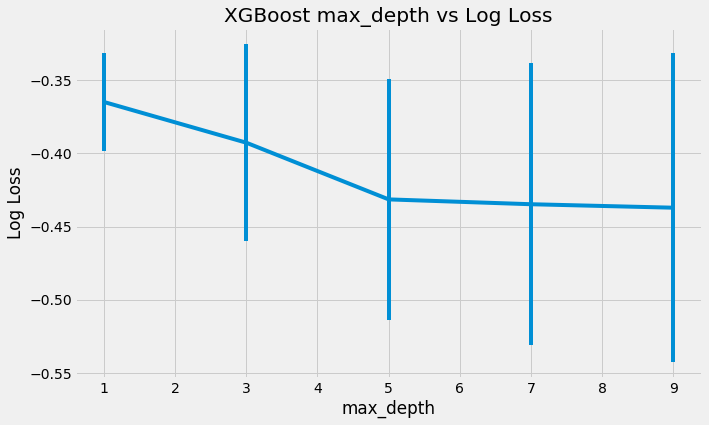

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 6]

# grid search
max_depth = range(1, 11, 2)
print(max_depth)

param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1,  iid=False)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')

##### We can see the log loss for each max_depth. The optimal configuration is max_depth=1 resulting in a log loss of 0.365.

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   40.2s finished


Best: -0.356265 using {'max_depth': 2, 'n_estimators': 50}
-0.356265 (0.043728) with: {'max_depth': 2, 'n_estimators': 50}
-0.372728 (0.049876) with: {'max_depth': 2, 'n_estimators': 100}
-0.387650 (0.056327) with: {'max_depth': 2, 'n_estimators': 150}
-0.396733 (0.060222) with: {'max_depth': 2, 'n_estimators': 200}
-0.372653 (0.059168) with: {'max_depth': 4, 'n_estimators': 50}
-0.408384 (0.078506) with: {'max_depth': 4, 'n_estimators': 100}
-0.436076 (0.088784) with: {'max_depth': 4, 'n_estimators': 150}
-0.462696 (0.095108) with: {'max_depth': 4, 'n_estimators': 200}
-0.386544 (0.077030) with: {'max_depth': 6, 'n_estimators': 50}
-0.437148 (0.090238) with: {'max_depth': 6, 'n_estimators': 100}
-0.475432 (0.107178) with: {'max_depth': 6, 'n_estimators': 150}
-0.504910 (0.114300) with: {'max_depth': 6, 'n_estimators': 200}
-0.383774 (0.078554) with: {'max_depth': 8, 'n_estimators': 50}
-0.436661 (0.096382) with: {'max_depth': 8, 'n_estimators': 100}
-0.474177 (0.108619) with: {'max_de

Text(0, 0.5, 'Log Loss')

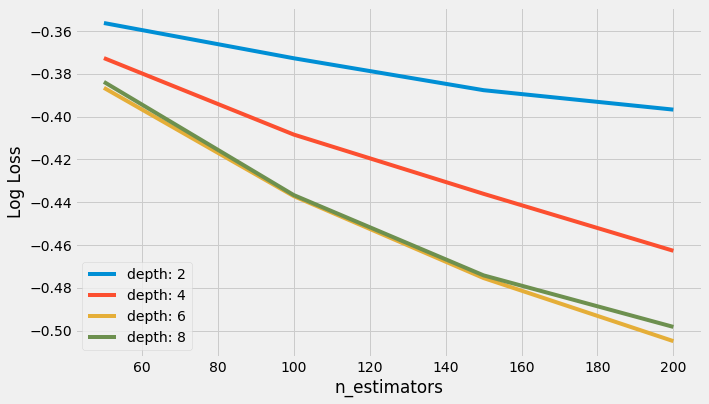

In [86]:
import numpy

n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1, iid=False)
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')

##### We  see here that, the best result was achieved with a n_estimators=50 and max_depth=2.
### Random Hyperparameter Grid

In [88]:
xgb = XGBClassifier(objective='binary:logistic', random_state=7, n_jobs=-1)
xgb.fit(x_train_scaled, y_train)
scores = cross_val_score(xgb, x_train_scaled, y_train, cv=kfold, scoring='brier_score_loss')
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: 0.12247


In [89]:
print(xgb.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 7, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [93]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=9)],
    'max_depth': [i for i in range(3, 10)],
    'min_child_weight': [i for i in range(1, 7)],
    'subsample': [i/10.0 for i in range(6,11)],
    'colsample_bytree': [i/10.0 for i in range(6,11)]
}
 
# Create the randomised grid search model
# "n_iter = number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution"
rgs = RandomizedSearchCV(estimator=xgb, param_distributions=params, n_iter=200, cv=kfold, 
                         random_state=7, n_jobs=-1,
                         scoring='brier_score_loss', return_train_score=True)
# Fit rgs
rgs.fit(x_train_scaled, y_train)
 
# Print results
print(rgs)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=Non...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 

In [94]:
best_score = rgs.best_score_
best_params = rgs.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.10716933389999735
Best params: 
colsample_bytree: 1.0
learning_rate: 0.01
max_depth: 3
min_child_weight: 3
n_estimators: 200
subsample: 1.0


In [95]:
# make predictions for test data and evaluate
rgs_pred = rgs.predict(X_test_scaled)

print('Accuracy: ', round(accuracy_score(y_test, rgs_pred)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, rgs_pred),3)))
print('Recall: ', round(recall_score(y_test, rgs_pred)*100, 2))
print('\n Classification Report:\n', classification_report(y_test, rgs_pred))

print(result.mean())

Accuracy:  82.0
Cohen Kappa: 0.58
Recall:  84.31

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       149
           1       0.61      0.84      0.70        51

    accuracy                           0.82       200
   macro avg       0.77      0.83      0.79       200
weighted avg       0.85      0.82      0.83       200

0.841


##### The XGB model provides imporved performance @ 82% with fitted model ( which means 1 in every 18 fraud reported are incorrect). 
 - The recall score as 84.1% (almost 2 of every 10 fraud reported in reality are missed and 8 labeled as fraud).
   So, higher the recall is better for our model here. f1 is balancing between precision and recall. Here, in our case  False Negative and False Positive usually has business costs (tangible & intangible).

#### Validating fitted model accuracy for LogicticsRegressionCV

In [96]:
xgb = XGBClassifier()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('XGB', XGBClassifier()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.828750 (0.023083)


In [97]:
# Fit rgs
model.fit(x_train_scaled, y_train)

# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 79.50%


#### In comparison, logreg classifier fitted model accuracy score is 79.5%.

In [98]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, rgs_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.55


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.55')

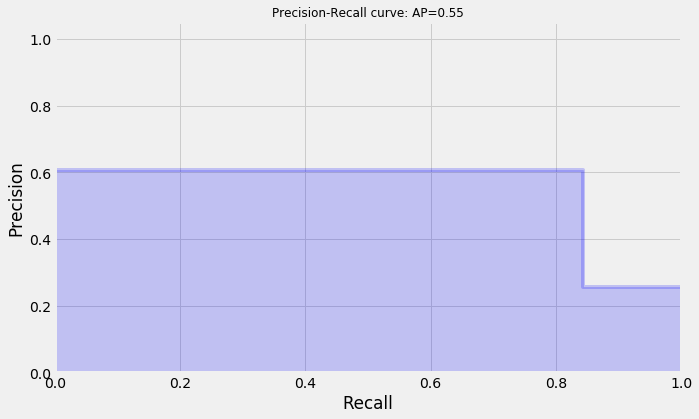

In [99]:
from sklearn.metrics import precision_recall_curve
from inspect import signature

plt.rcParams['figure.figsize'] = [10, 6]

precision, recall, _ = precision_recall_curve(y_test, rgs_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision), fontsize=12)

AUC: 0.828


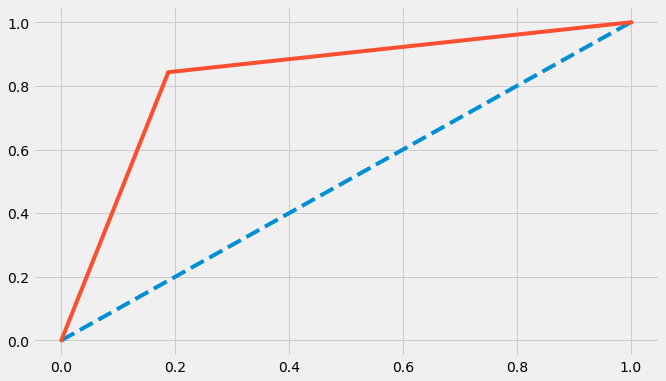

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_test, rgs_pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, rgs_pred)

# plot no skill
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

##### We see here that, model can measure the correct true negative predictions

Confusion matrix
[[121  28]
 [  8  43]]


<Figure size 720x432 with 0 Axes>

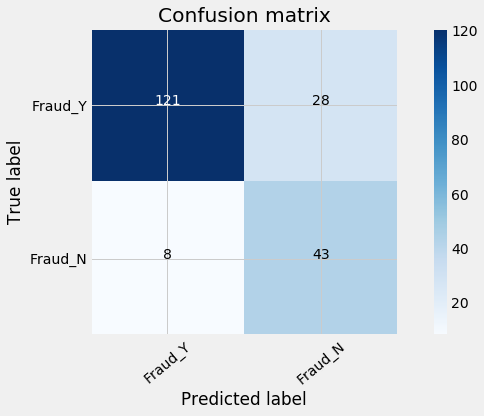

In [101]:
from sklearn.metrics import confusion_matrix
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    
    print('Confusion matrix')

    print(cm)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(10,6))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rgs_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud_Y','Fraud_N'],
                      title='Confusion matrix')

From the confusion matrix we see that,


Err = {(28+8) / (121+8+28+43)}*100 = 18%

So, the algorithm misclassified 18% fraudulent transactions. 
### Let's check the accuracy after dimensionality reduction using LDA model.

In [102]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.057) 
constant_filter.fit(X_train_scaled)  

constant_columns = [column for column in X_train_scaled.columns  
                    if column not in X_train_scaled.columns[constant_filter.get_support()]]

print(len(constant_columns)) 

0


##### Let's check the correlated features in the training data.

In [103]:
correlated_features = set()  
correlation_matrix = X_train_scaled.corr()  

for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
len(correlated_features)  

10

In [104]:
print(correlated_features)  

{'csl_per_accident_300', 'vehicle_claim', 'csl_per_accident_500', 'number_of_vehicles_involved', 'auto_model_Wrangler', 'injury_claim', 'csl_per_accident_1000', 'insured_sex_MALE', 'property_claim', 'age'}


#### Important information can be found from the correlated features which is useful for insurance company to view at. So, will check the accuracy dropping these variables.

In [105]:
X.head(1)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vehicle_age
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,3,328,48

In [106]:
x = X.drop([ 
       'vehicle_claim', 
        'injury_claim', 
        'age', 
        'csl_per_accident_500', 
        'csl_per_accident_1000', 
        'auto_model_Wrangler', 
        'insured_sex_MALE', 
        'csl_per_accident_300', 
        'property_claim', 
        'number_of_vehicles_involved'], axis=1)

x.head(1)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_X5,auto_model_X6,csl_per_person_100,csl_per_person_250,csl_per_person_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,property_damage,police_report_available,collision_en,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,bodily_injuries,witnesses,total_claim_amount,vehicle_age
0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,3,328,1000,1406.91,0,53300,0,1,2,71610,14


In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(x_train), len(x_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


In [108]:
a_train_scaled = scaler.fit_transform(x_train)
a_test_scaled = scaler.transform(x_test)

In [109]:
xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, a_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.822500 (0.037417)
XGB: 0.820000 (0.033166)


###### There is no significant change in performance; so, will keep the fitted XGB model as the final model for this project.